<a href="https://colab.research.google.com/github/AbhilashIngale/EVA-Projects/blob/master/Session_4/Session4_Second_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 4 : Train MNIST  with a custom Neural Network achieving 99.4% accuracy ( keeping parameter count below 15k )

# Iteration 2 
## AIM : In this iteration, the aim is to introduce Batch Normalization before each of the convolution operation and train the model form 30 epochs on same batch size (20). We are increasing the number of epochs, to see if it could increase the test accuracy. 



##Import Libraries and modules##

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
# Import all the dependancies and packages required
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D  
from keras.utils import np_utils

# Import the MNIST dataset from keras
from keras.datasets import mnist

## Load pre-shuffled MNIST data into train and test sets

In [0]:
# Doing the train-test split on the MNIST dataset. Default split ratio (test to train ) is : 1:6
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


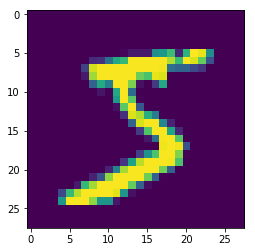

In [0]:
# Visualizing one of the images from the training set
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Converting the intensity range from 0-255 to 0-1 . This is done basically to avoid high computations and preserve system memory.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
# Print the true labels in the training set.
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
# Print the class matrix of the training set. Here, the true label is the one where '1' occurs for each training point.
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Network Architecture : Iteration 2 - Introducing Batch Normalization and playing with number of epochs

In [0]:
# Importing Activation function and Batch Norm 
from keras.layers import Activation
from keras.layers import BatchNormalization as BN

############################ START #############################################

model = Sequential()
 
model.add(Convolution2D(12, 3, 3,activation='relu', input_shape=(28,28,1))) #26  
model.add(BN())
model.add(Convolution2D(24, 3, 3,activation='relu')) #24                            
model.add(BN())

model.add(Convolution2D(12, 1, 1, activation='relu')) #24                            
model.add(MaxPooling2D(pool_size=(2, 2))) #12                                      

model.add(Convolution2D(12, 3, 3, activation='relu')) # 10                           
model.add(BN())
model.add(Convolution2D(18, 3, 3, activation='relu')) # 8                          
model.add(BN())
model.add(Convolution2D(24, 3, 3, activation='relu')) # 6                         
model.add(BN())
model.add(Convolution2D(10, 1, 1, activation='relu')) # 6                                  
model.add(MaxPooling2D(pool_size=(2, 2)))  # 3                                    
                                                       
model.add(Convolution2D(10, 3, 3, activation= None )) #1                            
model.add(BN())

model.add(Flatten())
model.add(Activation('softmax'))

############################## END #############################################

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel

In [0]:
# Shows the image shape after each convolution and the parameter count. Also, shows the trainable and non-trainable parameters. 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 12)        120       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 12)        48        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 24)        2616      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 24)        96        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 12)        300       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 12)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 12)        1308      
__________

In [0]:
# Compile the model: Specify loss function , optimizer e.g. SGD , adam etc.(in optimizer set learning rate which is a hyper-parameter)
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
# FIT 
model.fit(X_train, Y_train, batch_size=20, nb_epoch=30, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/30
60000/60000 [==============================] - 36s 594us/step - loss: 0.4445 - acc: 0.9064
Epoch 2/30
60000/60000 [==============================] - 32s 533us/step - loss: 0.1809 - acc: 0.9609
Epoch 3/30
60000/60000 [==============================] - 33s 542us/step - loss: 0.1172 - acc: 0.9738
Epoch 4/30
60000/60000 [==============================] - 33s 542us/step - loss: 0.0887 - acc: 0.9791
Epoch 5/30
60000/60000 [==============================] - 32s 531us/step - loss: 0.0744 - acc: 0.9819
Epoch 6/30
60000/60000 [==============================] - 33s 550us/step - loss: 0.0625 - acc: 0.9845
Epoch 7/30
60000/60000 [==============================] - 34s 562us/step - loss: 0.0572 - acc: 0.9856
Epoch 8/30
60000/60000 [==============================] - 34s 562us/step - loss: 0.0491 - acc: 0.9873
Epoch 9/30
60000/60000 [==============================] - 34s 571us/step - loss: 0.0449 - acc: 0.9889
Epoch 10/30
60000/60000 [==============================] - 33s 542us/step - loss: 

In [0]:
# Making predictions on the test set and storing the result y_pred
y_pred = model.predict(X_test)

In [0]:
# Evaluates the metrics i.e. Loss and Accuracy on the test set
score = model.evaluate(X_test, Y_test, verbose=0)
# Printing the metrics evaluated above
print(score)

[0.02376448951968341, 0.9925]


## Observation
### As expected, batch Normalization increases the test accuracy by 0.24 % while there is not much fluctuation in train accuracy in comaprison to the previous Vanilla Network.

In [0]:
# print the predicted class matrix and true test labels.
print(y_pred[:9])
print(y_test[:9])

[[9.5526246e-08 2.2590940e-07 4.6629001e-08 1.1578138e-07 9.3138069e-06
  3.8271349e-08 3.9290203e-06 9.9998605e-01 4.7984323e-09 2.0127474e-07]
 [1.4601481e-05 1.3408256e-08 9.9997938e-01 8.2436863e-08 4.5662059e-06
  4.4384638e-09 6.9463863e-07 4.4651046e-07 1.1428798e-07 4.3150575e-08]
 [4.4061585e-06 9.9996734e-01 3.4653019e-07 6.4168705e-07 2.0755715e-06
  1.0404167e-05 4.7716135e-06 8.3751365e-06 5.3436145e-07 1.1814088e-06]
 [9.9998975e-01 5.6263144e-07 2.5285924e-08 6.7332905e-07 4.3437336e-07
  1.0960831e-07 5.2495088e-06 2.5537356e-06 5.0798940e-07 3.6393054e-08]
 [2.0296591e-06 2.6081004e-06 3.0197593e-06 2.4004796e-06 9.9996793e-01
  2.1400794e-07 7.7118909e-07 1.0900886e-06 1.0303715e-05 9.6104486e-06]
 [9.8732908e-06 9.9995649e-01 5.0941770e-07 3.7402356e-07 4.7226463e-06
  1.4921360e-06 7.8662033e-06 1.5597469e-05 4.2783120e-07 2.6772827e-06]
 [8.4173888e-07 1.4717847e-05 9.7901318e-07 7.5328849e-08 9.9960989e-01
  1.6552085e-04 5.6006803e-07 3.5511434e-06 1.1599652e-05 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
################# CODE TO VISUALIZE FEATURE MAPS ###############################
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_65'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored